In [4]:
# main modules needed
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [6]:
df=pd.read_csv('012format_last.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,Unnamed: 0,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df.rename(columns={"Unnamed: 0": "id"},inplace=True)

In [9]:
df.head()

,id,Unnamed: 0.1,2,3,4,5,6,7,8,9,...,35210,35211,35212,35213,35214,35215,35216,35217,35218,35219
0,PI253651A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,PI347550A,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,2
2,PI408055A,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,PI408069,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,PI408169A,5,2,2,2,0,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cleaned_t = pd.read_csv('combined_ypo.csv')

In [11]:
cleaned_t.shape

(9821, 4)

In [12]:
g_plus_p=pd.merge(df,cleaned_t, left_on=df.id, right_on=cleaned_t.id, how='inner')

In [13]:
g_plus_p.shape

(8917, 35225)

In [14]:
g_plus_p.head()

,key_0,id_x,Unnamed: 0.1,2,3,4,5,6,7,8,...,35214,35215,35216,35217,35218,35219,id_y,yield,protein,oil
0,PI253651A,PI253651A,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI253651A,2.43,42.6,18.5
1,PI347550A,PI347550A,2,0,0,0,0,0,0,0,...,0,0,0,2,0,2,PI347550A,3.29,44.7,19.8
2,PI408055A,PI408055A,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI408055A,2.41,46.7,18.0
3,PI408069,PI408069,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,PI408069,NaN,43.2,20.6
4,PI408169A,PI408169A,5,2,2,2,0,2,0,2,...,0,0,0,0,0,0,PI408169A,1.93,45.8,16.4


### Mathine Learning for Protein Content

In [33]:
X=g_plus_p.iloc[:,3:35220]

In [34]:
Y=g_plus_p['protein'].fillna(np.mean(g_plus_p['protein']))

In [35]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7133, 35217) (7133,)
(1784, 35217) (1784,)


In [36]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 37.3 51.2 44.44895672437694 2.494817178587468
Test: 37.9 51.1 44.40351069156212 2.4383150943318808


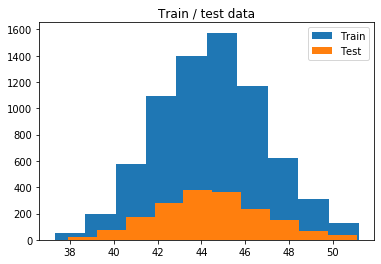

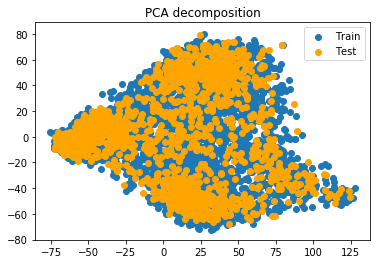

In [37]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

# marker PCA, use whole X with diff color for train and test
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

In [38]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)
print(len(pvals))


35216


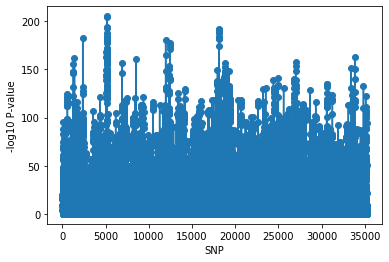

In [39]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# or select by min_P_value
min_P_value = 3 # P = 0.001
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]

In [31]:
snp_list

(array([    0,     1,     2, ..., 28000, 28001, 28002], dtype=int64),)


MSE in prediction = tf.Tensor(3.5916293, shape=(), dtype=float32)

Corr obs vs pred = 0.6351502470652748


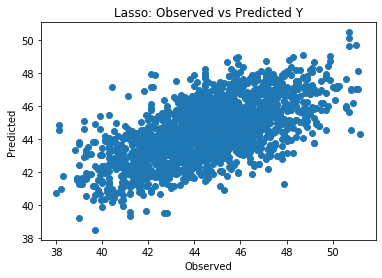

In [19]:
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


### Mathine Learning for Oil Content

In [1]:
X=g_plus_p.iloc[:,3:35220]

NameError: name 'g_plus_p' is not defined

In [2]:
Y=g_plus_p['oil'].fillna(np.mean(g_plus_p['oil']))

NameError: name 'g_plus_p' is not defined

In [14]:
 # first trait analyzed
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7133, 35217) (7133,)
(1784, 35217) (1784,)


In [15]:
print('       min max mean sd')
print('Train:', y_train.min(), y_train.max(), y_train.mean(), np.sqrt(y_train.var()))
print('Test:', y_test.min(), y_test.max(), y_test.mean(), np.sqrt(y_test.var()))

       min max mean sd
Train: 37.3 51.2 44.41775795684131 2.4966141875093064
Test: 38.0 51.2 44.52825329740871 2.4292762175812346


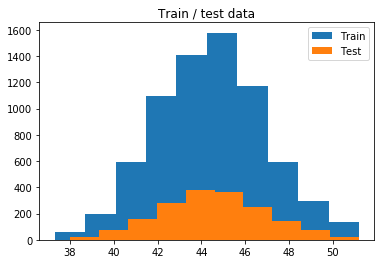

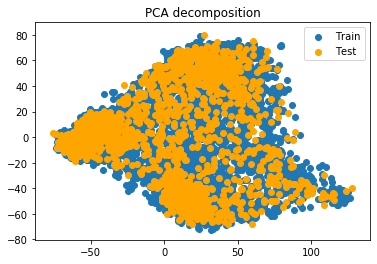

In [16]:
plt.title('Train / test data')
plt.hist(y_train, label='Train')
plt.hist(y_test, label='Test')
plt.legend(loc='best')
plt.show()

# marker PCA, use whole X with diff color for train and test
X = np.concatenate((X_train, X_test))
pca = PCA(n_components=2)
p = pca.fit(X).fit_transform(X)
Ntrain=X_train.shape[0]
plt.title('PCA decomposition')
plt.scatter(p[0:Ntrain,0], p[0:Ntrain,1], label='Train')
plt.scatter(p[Ntrain:,0], p[Ntrain:,1], label='Test', color='orange')
plt.legend(loc='best')
plt.show()

In [17]:
#  SNP preselection according to a simple GWAS
pvals = []
for i in range(X_train.shape[1]-1):
    b, intercept, r_value, p_value, std_err = stats.linregress(np.asarray(X_train.iloc[:,i]), np.asarray(y_train))
    pvals.append(-np.log10(p_value))
pvals = np.array(pvals)

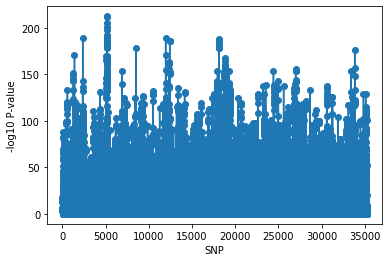

IndexError: index 28004 is out of bounds for axis 0 with size 28004

In [25]:
# plot GWAS
plt.ylabel('-log10 P-value')
plt.xlabel('SNP')
plt.plot(pvals, marker='o')
plt.show()

# select N_best most associated SNPs
#N_best = X_train.shape[1] #all SNPs
N_best = 10
snp_list = pvals.argsort()[-N_best:]

# or select by min_P_value
min_P_value = 2 # P = 0.01
snp_list = np.nonzero(pvals>min_P_value)

# finally slice X
X_train = X_train[X_train.columns[snp_list]] 
X_test = X_test[X_test.columns[snp_list]]


MSE in prediction = tf.Tensor(3.5916293, shape=(), dtype=float32)

Corr obs vs pred = 0.6351502470652748


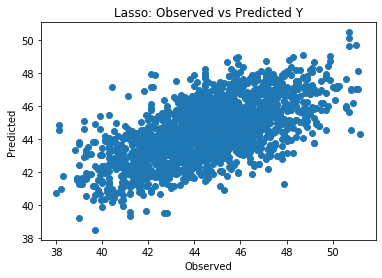

In [19]:
# alpha is the regularization parameter
lasso = linear_model.Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
y_hat = lasso.predict(X_test)

# mean squared error
mse = mean_squared_error(y_test, y_hat)
print('\nMSE in prediction =',mse)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat)[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('Lasso: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                51520     
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 53,633
Trainable params: 53,633
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7132/7132 [==============================] - 1s 179us/step - loss: 0.4605
Epoch 2/100
7132/7132 [=======

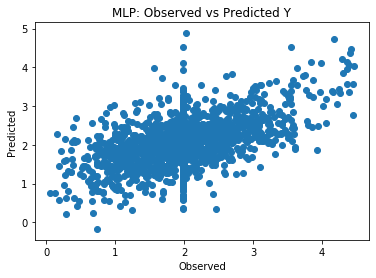

In [191]:
# Implements a standard fully connected network (MLP) for a quantitative target

# no. of SNPs in data
nSNP=X_train.shape[1] 

# Instantiate
model = Sequential()

# Add first layer
model.add(Dense(64, input_dim=nSNP))
model.add(Activation('relu'))
# Add second layer
model.add(Dense(32))
model.add(Activation('softplus'))
# Last, output layer
model.add(Dense(1))

# Model Compiling (https://keras.io/models/sequential/) 
# compile(optimizer, loss=None, metrics=None, loss_weights=None, sample_weight_mode=None, weighted_metrics=None, target_tensors=None)
# Stochastic Gradient Descent (‘sgd’) as optimization algorithm
# Mean Squared Error as loss, ie, quantitative variable, regression
model.compile(loss='mean_squared_error', optimizer='sgd')

# list some properties
model.summary()

# training
# fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_freq=1)
model.fit(X_train, y_train, epochs=100)

# cross-validation: get predicted target values
y_hat = model.predict(X_test, batch_size=128)

mse_prediction = model.evaluate(X_test, y_test, batch_size=128)
print('\nMSE in prediction =',mse_prediction)

# correlation btw predicted and observed
corr = np.corrcoef(y_test,y_hat[:,0])[0,1]
print('\nCorr obs vs pred =',corr)

# plot observed vs. predicted targets
plt.title('MLP: Observed vs Predicted Y')
plt.ylabel('Predicted')
plt.xlabel('Observed')
plt.scatter(y_test, y_hat, marker='o')
plt.show()

In [192]:
# Controlling overfit: regularization, dropout and early stopping

# deletes current model

del model

model = Sequential()

# Add l1 & l2 regularization in first layer
model.add(Dense(64, input_dim=nSNP,
                kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Activation('relu'))
# Add second layer
model.add(Dense(32))
model.add(Activation('softplus'))
## Adding dropout to second layer
model.add(Dropout(0.2))
# Last, output layer
model.add(Dense(1))

# Model Compiling (https://keras.io/models/sequential/) 
model.compile(loss='mean_squared_error', optimizer='sgd')

# Split the train set into proper train & validation
X_train0, X_val, y_train0, y_val = train_test_split(X_train, y_train, test_size=0.1)
nEpochs=100

# Early stopping
early_stopper = EarlyStopping(monitor='val_loss', patience=10, min_delta=0.01)
model.fit(X_train0, y_train0, epochs=nEpochs, verbose=1, validation_data=(X_val, y_val), callbacks=[early_stopper])

# cross-validation
mse_prediction = model.evaluate(X_test, y_test, batch_size=128)
print('\nMSE in prediction =',mse_prediction)


Train on 6418 samples, validate on 714 samples
Epoch 1/100
6418/6418 [==============================] - 1s 123us/step - loss: 10.2551 - val_loss: 6.5183
Epoch 2/100
6418/6418 [==============================] - 0s 52us/step - loss: 8.3253 - val_loss: 5.4534
Epoch 3/100
6418/6418 [==============================] - 0s 49us/step - loss: 8.5064 - val_loss: 5.1641
Epoch 4/100
6418/6418 [==============================] - 0s 52us/step - loss: 8.6367 - val_loss: 4.9410
Epoch 5/100
6418/6418 [==============================] - 0s 50us/step - loss: 8.6692 - val_loss: 4.7708
Epoch 6/100
6418/6418 [==============================] - 0s 64us/step - loss: 8.6144 - val_loss: 4.4881
Epoch 7/100
6418/6418 [==============================] - 0s 50us/step - loss: 8.6789 - val_loss: 4.5801
Epoch 8/100
6418/6418 [==============================] - 0s 66us/step - loss: 8.6322 - val_loss: 4.5289
Epoch 9/100
6418/6418 [==============================] - 0s 57us/step - loss: 8.6671 - val_loss: 4.0425
Epoch 10/100
64

In [193]:
# Defining pearson correlation as custom metric to model optimization in talos! 
# warning! you have to use acc in the metric name!

from keras import backend as K

def acc_pearson_r(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.sum(xm * ym)
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = K.sqrt(x_square_sum * y_square_sum)
    r = r_num / r_den
    return K.mean(r)

In [194]:
# https://autonomio.github.io/docs_talos/
# 1. Hyperparameter ranges and Model definition

# model definition
def baby_model(x, y, x_val, y_val, params):    
    # replace the hyperparameter inputs with references to params dictionary 
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x.shape[1],
                activation=params['activation']))
    #last neuron
    model.add(Dense(1, activation=None))
    model.compile(loss=mean_squared_error, optimizer='sgd', metrics=[acc_pearson_r])
    
    # make sure history object is returned by model.fit()
    out = model.fit(x, y,
                    epochs=50,
                    validation_data=[x_val, y_val],
                    batch_size=params['batch_size'],
                    verbose=0)
    
    # modify the output model
    return out, model

# dictionary with hyperparameters and range values allowed
p = {
    'first_neuron': [12, 48],
    'activation': [relu, elu],
    'batch_size': [10, 30]
}

In [195]:
# HYPERPARAMETER OPTIMIZATION USING TALOS: Simple example
# 2. Search, run this grid should take between 1-2 minutes

# Split the train set into proper train & validation
X_train0, X_val, y_train0, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_train0=np.asarray(X_train0)
X_val=np.asarray(X_val)
y_train0=np.asarray(y_train0)
y_val=np.asarray(y_val)

# COOL! this shows real time plots
t_Init = ta.Scan(x=X_train0,
                 y=y_train0,
                 x_val=X_val,
                 y_val=y_val,
                 model=baby_model, 
                 params=p, 
                 experiment_name="Baby",
                 print_params=True)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

{'activation': <function relu at 0x00000238F02DD2F0>, 'batch_size': 10, 'first_neuron': 12}


 12%|██████████▌                                                                         | 1/8 [00:23<02:43, 23.32s/it]

{'activation': <function relu at 0x00000238F02DD2F0>, 'batch_size': 10, 'first_neuron': 48}


 25%|█████████████████████                                                               | 2/8 [00:48<02:23, 23.87s/it]

{'activation': <function relu at 0x00000238F02DD2F0>, 'batch_size': 30, 'first_neuron': 12}


 38%|███████████████████████████████▌                                                    | 3/8 [00:59<01:40, 20.10s/it]

{'activation': <function relu at 0x00000238F02DD2F0>, 'batch_size': 30, 'first_neuron': 48}


 50%|██████████████████████████████████████████                                          | 4/8 [01:12<01:11, 17.85s/it]

{'activation': <function elu at 0x00000238F02CFEA0>, 'batch_size': 10, 'first_neuron': 12}


 62%|████████████████████████████████████████████████████▌                               | 5/8 [01:36<00:58, 19.66s/it]

{'activation': <function elu at 0x00000238F02CFEA0>, 'batch_size': 10, 'first_neuron': 48}


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [02:01<00:42, 21.44s/it]

{'activation': <function elu at 0x00000238F02CFEA0>, 'batch_size': 30, 'first_neuron': 12}


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [02:13<00:18, 18.40s/it]

{'activation': <function elu at 0x00000238F02CFEA0>, 'batch_size': 30, 'first_neuron': 48}


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:25<00:00, 16.64s/it]


   round_epochs  val_loss  val_acc_pearson_r      loss  acc_pearson_r  \
0            50  0.337123           0.592495  0.201840       0.732179   
1            50  0.408362           0.541443  0.118021       0.845422   
2            50  0.342401           0.611849  0.220178       0.728081   
3            50  0.351572           0.588999  0.122998       0.861811   
4            50  0.369841           0.606163  0.210649       0.708790   
5            50  0.396936           0.569952  0.154584       0.807719   
6            50  0.318599           0.627416  0.215227       0.735338   
7            50  0.320599           0.632496  0.174804       0.793961   

                              activation  batch_size  first_neuron  
0  <function relu at 0x00000238F02DD2F0>          10            12  
1  <function relu at 0x00000238F02DD2F0>          10            48  
2  <function relu at 0x00000238F02DD2F0>          30            12  
3  <function relu at 0x00000238F02DD2F0>          30            48

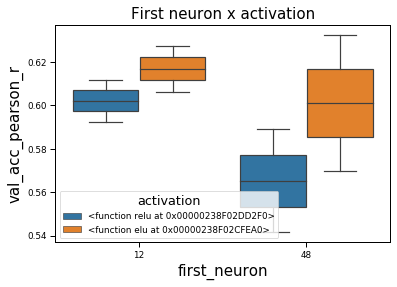

In [197]:
# HYPERPARAMETER OPTIMIZATION USING TALOS: Simple example
# 3. Inspect results
Data=pd.DataFrame(t_Init.data)
Data["loss"] = pd.to_numeric(Data["loss"])
Data["val_acc_pearson_r"] = pd.to_numeric(Data["val_acc_pearson_r"])
print(Data)

# Minimum loss set
i=Data['val_acc_pearson_r'].argmax()
print('\nBest prediction combination:')
print(Data[i:(i+1)],'\n')

# Visualize some parameters combinations 
x = sns.boxplot(y="val_acc_pearson_r",x="first_neuron",hue="activation",data=Data).set_title('First neuron x activation')

In [198]:
# HYPERPARAMETER OPTIMIZATION USING TALOS: more complex example
# We do a random search here (by downsampling among all possible grid values)

# model definition
def grown_model(x, y, x_val, y_val, params):
    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))
    
    # if we want to also test for number of layers and shapes, that's possible
    hidden_layers(model, params, 1)

    # then we finish again with completely standard Keras way
    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
        optimizer=params['optimizer'](lr=lr_normalizer(params['lr'],params['optimizer'])),
            metrics=[acc_pearson_r])
                  
   
    out = model.fit(x, y, validation_data=[x_val, y_val], verbose=0,batch_size=params['batch_size'],
                        epochs=params['epochs'])

    # finally we have to make sure that history object and model are returned
    return out, model

# hyperparameters
p = {'first_neuron':[32,64],
     'lr':[0.2,0.5],
     'batch_size': [30,50],
     'hidden_layers':[1,2,3,4],
     'epochs': [100],
     'dropout': [0, 0.01, 0.1, 0.5],
     'optimizer': [adam,sgd,Nadam],
     'losses': [mean_squared_error],
     'activation':[relu, elu,linear],
     'last_activation': [None],
       'shapes': ['brick'],   
     'kernel_initializer':["uniform","normal"]}

# Split the train set into proper train & validation
X_train0, X_val, y_train0, y_val = train_test_split(X_train, y_train, test_size=0.1)
X_train0=np.asarray(X_train0)
X_val=np.asarray(X_val)
y_train0=np.asarray(y_train0)
y_val=np.asarray(y_val)

# Example with multiclass target
# grid_downsample number of combinations to be checked 10% in this example
tcomp = ta.Scan(x=X_train0,
                y=y_train0,
                x_val=X_val,
                y_val=y_val,
                model=grown_model, 
                params=p, 
              
                experiment_name='exte_model',
               fraction_limit=0.01)

100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [11:47<00:00, 29.73s/it]


In [199]:
# Some plotting
Data=pd.DataFrame(tcomp.data)
Data["val_loss"] = pd.to_numeric(Data["val_loss"])
Data["acc_pearson_r"] = pd.to_numeric(Data["acc_pearson_r"])
Data["val_acc_pearson_r"] = pd.to_numeric(Data["val_acc_pearson_r"])
#print Data
#print(Data)
#write Data
Data.to_csv("mlp_real_world.csv",index=False)


Best loss combination:
    round_epochs  val_loss  val_acc_pearson_r      loss  acc_pearson_r  \
18           100  0.284062           0.605211  0.243936       0.704584   

                              activation  batch_size  dropout  epochs  \
18  <function elu at 0x00000238F02CFEA0>          30      0.5     100   

    first_neuron  hidden_layers kernel_initializer last_activation  \
18            32              2             normal            None   

                                               losses   lr  \
18  <function mean_squared_error at 0x00000238F025...  0.5   

                           optimizer shapes  
18  <class 'keras.optimizers.Nadam'>  brick   



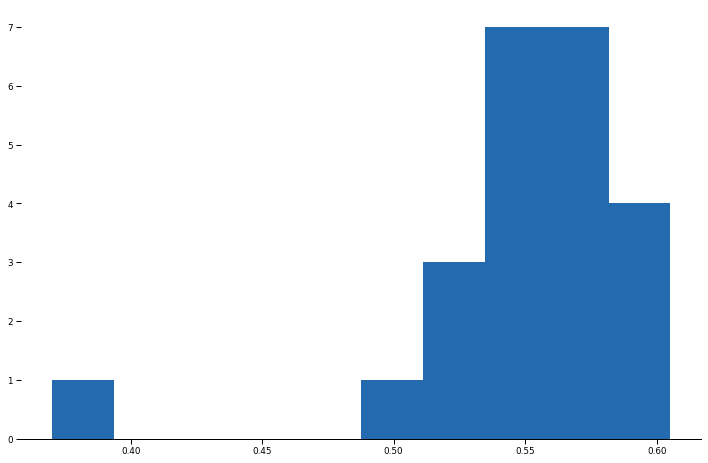

In [200]:
# Maximum correlation
i=Data['val_acc_pearson_r'].argmax()
print('\nBest loss combination:')
print(Data[i:(i+1)],'\n')
# talos have a function called reporting, which has implemented some plots 
# reporting to see the best model, draw an histogram
r = ta.Reporting('mlp_real_world.csv')
r.plot_hist('val_acc_pearson_r')

0.6052106022834778


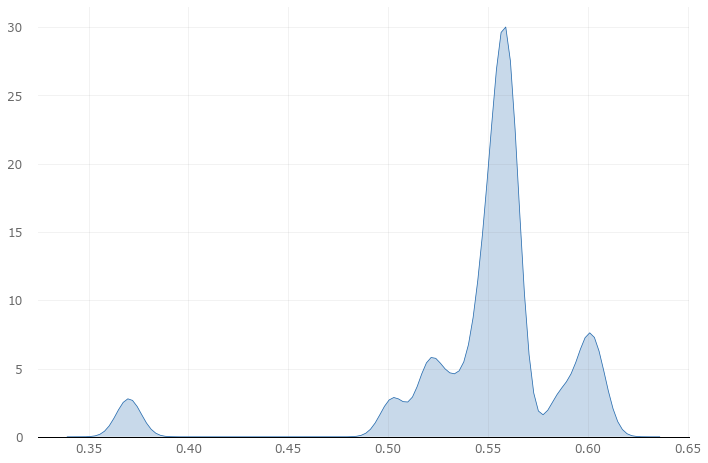

In [201]:
print(r.high('val_acc_pearson_r'))
# we can see the distribution of the val_acc parameter chosen 
r.plot_kde('val_acc_pearson_r')

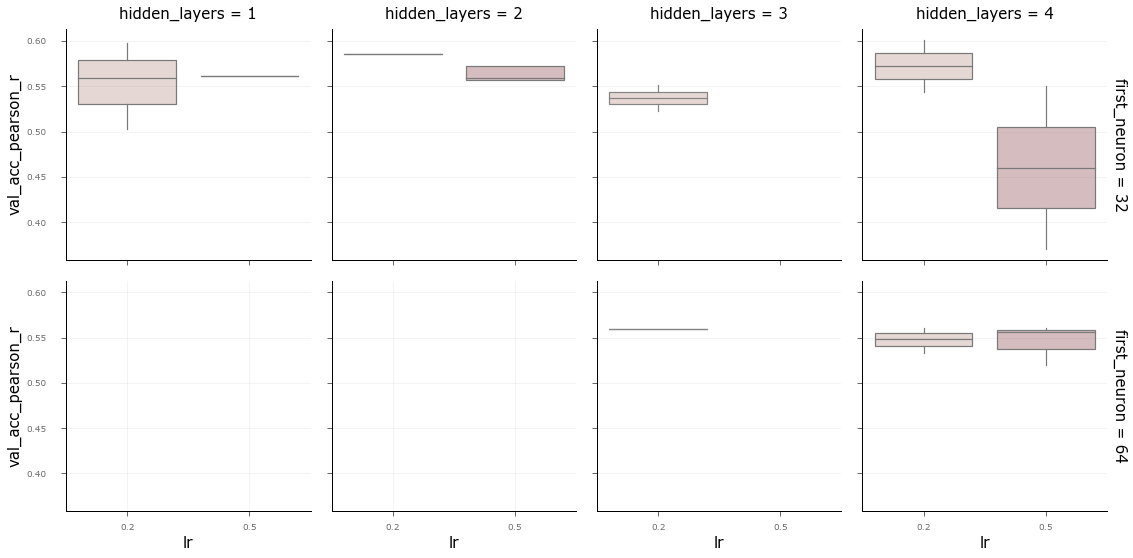

In [202]:
import seaborn as sns
# You also can use seaborn to check other combination of parameters
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})   
g = sns.FacetGrid(tcomp.data, col="hidden_layers",row="first_neuron", margin_titles=True,height=4)
g.map(sns.boxplot,"lr","val_acc_pearson_r", palette=sns.cubehelix_palette(8),saturation=.5);